In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier

In [7]:
df =pd.read_csv('Feature_Importance.csv',header = None)
df = df.drop(index = [0])
X = df.loc[:,1:56]
y = df.loc[:,57]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size = 0.15,random_state = 9,stratify = y)

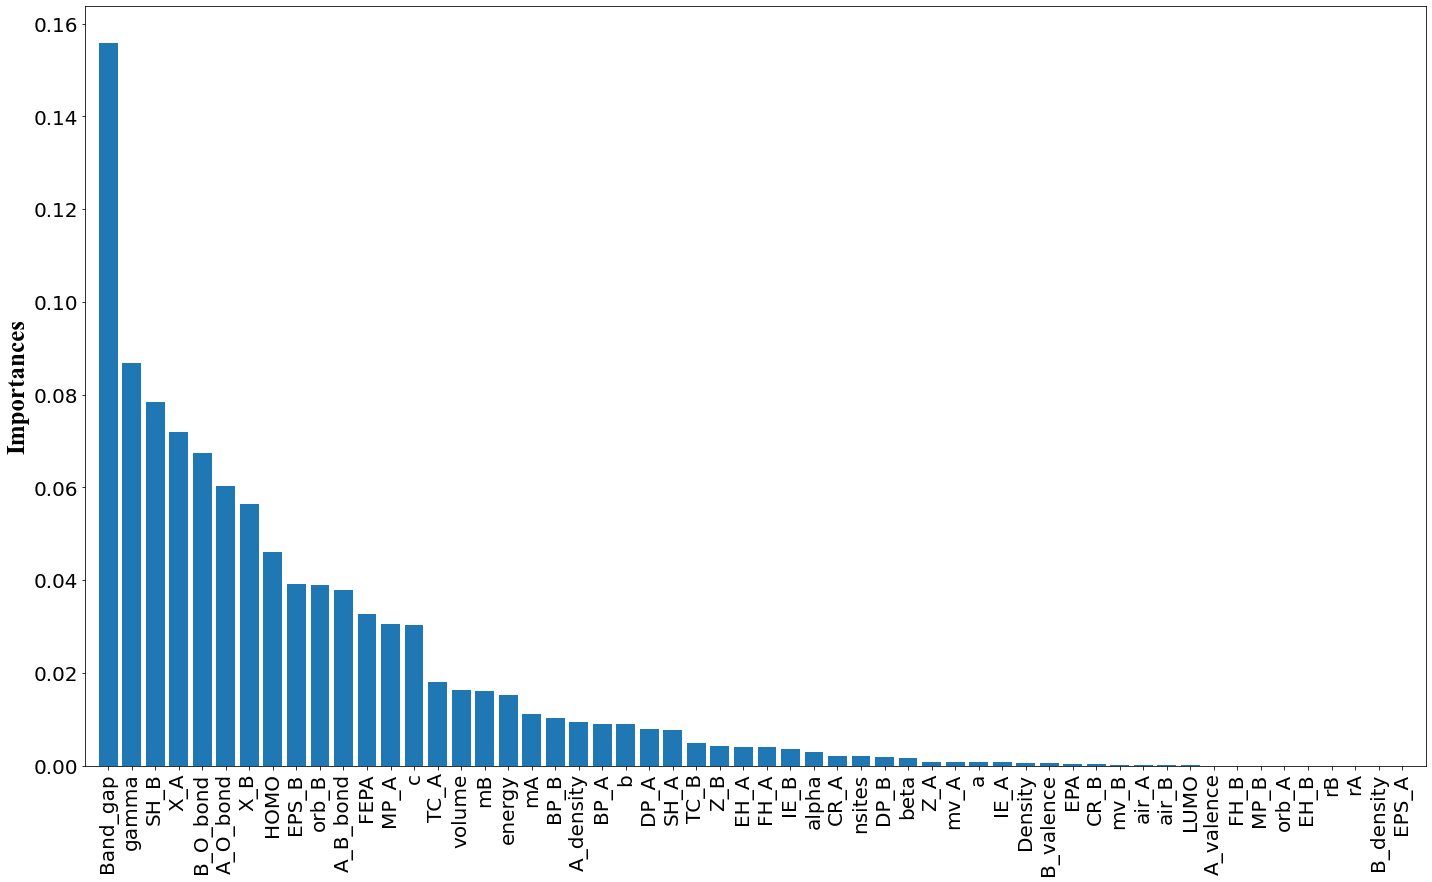

In [8]:
GDBC = GradientBoostingClassifier(n_estimators = 2000,
                                random_state =9)
GDBC.fit(X,y)
importances = GDBC.feature_importances_
indices = np.argsort(importances)[::-1]
a = []
for f in range(0,X_train.shape[1]):
    a.append(feat_labels[indices[f]])
font1 = {'family':'Times New Roman',
         'weight':'bold',
         'size':25}
plt.figure(figsize=(20,12.36))
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align = 'center')
plt.xticks(range(X_train.shape[1]),
           a,rotation=90)    
plt.xlim([-1,X_train.shape[1]])
plt.tick_params(labelsize = 20)
plt.ylabel('Importances',font1)
plt.tight_layout()
plt.show()